# Mathematical Modeling Lab @ Constructor University 


$\text{A joint-work between Omar Elshinawy & Mohammad Habibi-Bennani, this project was completed in Spring of 2024 for a class in Mathematical }$
$\text{Modeling at Constructor University, under Professor Ivan Ovsyannikov and Mr Dzmitry Rumiantsau. }$

We start by importing the very basic libraries for this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Problem 1.** Let us consider the equation of a damped harmonic oscillator, 

$$\ddot x + 2 \zeta \dot x + x = 0$$

$\textbf{1.0.}$ We start by introducing a meaningful change of variable 

$$v = \dot x,$$ 

which yields 

$$\frac d {dt} ~ y := \frac d {dt}~ \Big(\begin{matrix} x\\v\end{matrix} \Big)= \begin{cases} \dot x = v \\ \dot v = -2 \zeta v - x\end{cases}$$

that is a first-order system of equations. We can represent this in python as follows,

In [2]:
def damped_oscillator(t, y, zeta):
    x, v = y
    dxdt = v
    dvdt = -x - 2 * zeta * v
    return [dxdt, dvdt]

with $y$ the vector of position $x$ and velocity $v$, $t$ the time variable, and $\zeta$ the parameter. 

It returns the position and velocity derivatives respectively, which respect the aforementioned system.

$\textbf{1.1}$ Let us solve this system for the parameters

$$\zeta_1 = 0.25, \zeta_2 = 1, \zeta_3 = 2$$

In [3]:
zeta_1 = 0.25; zeta_2 = 1; zeta_3 = 2
zetas = [zeta_1, zeta_2, zeta_3] # array of parameters

and initial conditions

$$x(0) = 1~~\&~~ v(0) = 0.$$

In [4]:
x_0 = 1; v_0 = 0
y_0 = [x_0, v_0] # vector of initial conditions

Let us set a timeframe of 10 seconds.

$$t \in [0, 10]$$

In [5]:
t_0 = 0; t_1 = 10

$\textbf{1.1.1. Explicit Euler Method}$

First, observe that our system is given by

$$\frac d {dt} y = f(t, y, \zeta)~~~~\text{with}~~~ y \in \mathbb R^2.$$


To approximate a solution to this system, we start by defining the time steps.

$$t_n = t_0 + n \cdot \Delta t \quad \text{for} \quad n = 0, 1, 2, \ldots, N$$


Next, the solution is initialised with the initial condition

$$
y_0 = y(t_0).
$$

We then iterate over each time step to compute the solution.

$$
y_{n+1} = y_n + \Delta t \cdot f(t_n, y_n, \zeta) \quad \text{for} \quad n \in \{0, \dots, N-1\}
$$


In this context:
- $ y_n $ is the approximation of $ y(t_n) $ from the previous iterate.
- $ f(t_n, y_n, \zeta) $ is the value of $ f $ at time $ t_n $, state $ y_n $, and parameter $ \zeta $.

The sequence $\{y_n\}_{n \in \mathbb N}$ should converge to our solution.

In [6]:
def explicit_euler(f, y_0, t_0, t_1, dt, zeta):
    
    # time steps 
    t_n = np.arange(t_0, t_1, dt) 
    # initialising t x 2 matrix of values with each row denoting (x, v) at time t
    y_n = np.zeros((len(t_n), len(y_0))) 
    # set the initial condition, y(0) := (x_0, v_0) at t=0
    y_n[0] = y_0
    
    # loop from 1 to N - 1
    for i in range(1, len(t_n)):
        # y_{n+1} = y_n + dt  f(t_n, y_n, \zeta)
        y_n[i] = y_n[i-1] + dt * np.array(f(t_n[i-1], y_n[i-1], zeta))

    # return (x,t) values at time t_n
    return y_n

To solve the system, one now simply calls the function with the correct input. We will delay this for one moment.

$\textbf{1.1.2. Implicit Euler Method}$

The implicit Euler method is unsurprisingly implicit in the following sense.

$$y_{n+1} = y_n + \Delta t \cdot f(t_{n+1}, y_{n+1}, \zeta)$$


We see that $y_{n+1}$ is prevalent in both sides, meaning that for every $y_n$ we have an equation that needs to be solved, of the form


$$y_{n+1} - y_n - \Delta t \cdot f(t_{n+1}, y_{n+1}, \zeta) = 0.$$


Not to distract ourselves from the main objectives, we use ```fsolve``` to obtain $y_{n+1}$ from the previous equation. 

In [7]:
from scipy.optimize import fsolve

Recall that $y_n, ~\Delta t, \zeta$ are given, so that the equation above indeed yields $y_{n+1},$ its root.

In [8]:
def implicit_euler(f, y_0, t_0, t_1, dt, zeta):
    
    # time steps 
    t_values = np.arange(t_0, t_1, dt)
    # initialising t x 2 matrix of values with each row denoting (x, v) at time t
    y_values = np.zeros((len(t_values), len(y_0)))
    # set the initial condition, y(0) := (x_0, v_0) at t=0
    y_values[0] = y_0

    # for every time stamp
    for i in range(1, len(t_values)):
        t = t_values[i]

        # define the implicit function
        def implicit_eq(y_new):
            return y_new - y_values[i-1] - dt * np.array(f(t, y_new, zeta))

        # solve it using fsolve
        y_values[i] = fsolve(implicit_eq, y_values[i-1])

    # return the array of answers
    return y_values

We will also delay calling the function for now. This is for the sake of conciseness.

$\textbf{1.1.3}~~$   ```scipy.integrate.solve_ivp```

There is no magic here, really. 

In [9]:
from scipy.integrate import solve_ivp

We can simply solve the equation for different timesteps and parameters. Usually this is of the form


```solve_ivp(f, [t_0, t_1], y_0, args=(zeta,), t_eval=np.arange(t_0, t_1, dt))```

where ```f``` would be `damped_oscillator`, `y_0` the initial conditions, `zeta` the argument, and `dt` the preferred timestep. 

$\textbf{1.1 Altogether: The Data Dictionary}$


For conciseness, we will be defining a dictionary `X[dt][zeta]['x' or 'v'][-]` for timestamp $dt,$ parameter $\zeta $ such that,
- ```X[-][-][-][0]``` is the reference solution using ```solve_ivp```; 
- ```X[-][-][-][1]``` is the explicit Euler method; 
- ```X[-][-][-][2]``` is the implicit Euler method.

We do not go into the details of constructing such a dictionary, as it takes us away from the main goals of this project.

We start by defining `tstamps`, an array of timestamps $\Delta t \in [0.01, 1].$ 

In [10]:
N = 100
tstamps = np.linspace(0.01, 1, N)
#print(tstamps)

From here we can choose two timesteps of different size. This will turn out to be a useful generalisation for the sake of this discussion. 

In [11]:
dt_0 = tstamps[0]; dt_1 = tstamps[N*14//100]

This is just

$$\Delta t_0 = 0.01 ~\&~ \Delta t_1 = 0.15,$$

which we call directly from the `tstamps` array to avoid numerical rounding errors.

In [12]:
print(f"dt_0 = {dt_0} | dt_1 = {dt_1:.2f}")

dt_0 = 0.01 | dt_1 = 0.15


In [13]:
X = {}

# for all timestamps
for dt in tstamps:
    X[dt] = {} # Initialize dictionary
    
    # for all zetas
    for zeta in zetas:
        X[dt][zeta] = {'x': [], 'v': []}  # Initialize placeholders x, v
        
        # More data handling
        X[dt][zeta]['x'] = [None, None, None] 
        X[dt][zeta]['v'] = [None, None, None]
        
        # Reference Solution solve_ivp
        reference = solve_ivp(damped_oscillator, [t_0, t_1], y_0, args=(zeta,), t_eval=np.arange(t_0, t_1, dt))
        X[dt][zeta]['x'][0] = reference.y[0] # y[0] gives x
        X[dt][zeta]['v'][0] = reference.y[1] # y[1] gives v
        
        # Explicit Euler Method
        explicit = explicit_euler(damped_oscillator, y_0, t_0, t_1, dt, zeta)
        X[dt][zeta]['x'][1] = explicit[:, 0] # 0 gives x
        X[dt][zeta]['v'][1] = explicit[:, 1] # 1 gives v

        # Implicit Euler Method
        implicit = implicit_euler(damped_oscillator, y_0, t_0, t_1, dt, zeta)
        X[dt][zeta]['x'][2] = implicit[:, 0] # 0 gives x
        X[dt][zeta]['v'][2] = implicit[:, 1] # 1 gives v

And now, finding the right function has never been so simple. One only needs to call the correct function (with the correct parameters) to solve the system.

$\textbf{1.2. The Phase Space Trajectory.}$

The phase space trajectory is a plot of displacement against velocity. We proceed to demonstrate that below for 

$$\Delta t_0 = 0.01 ~\&~ \Delta t_1 = 0.15$$

as well as for $\zeta \in \{0.25, 1, 2\}$. 

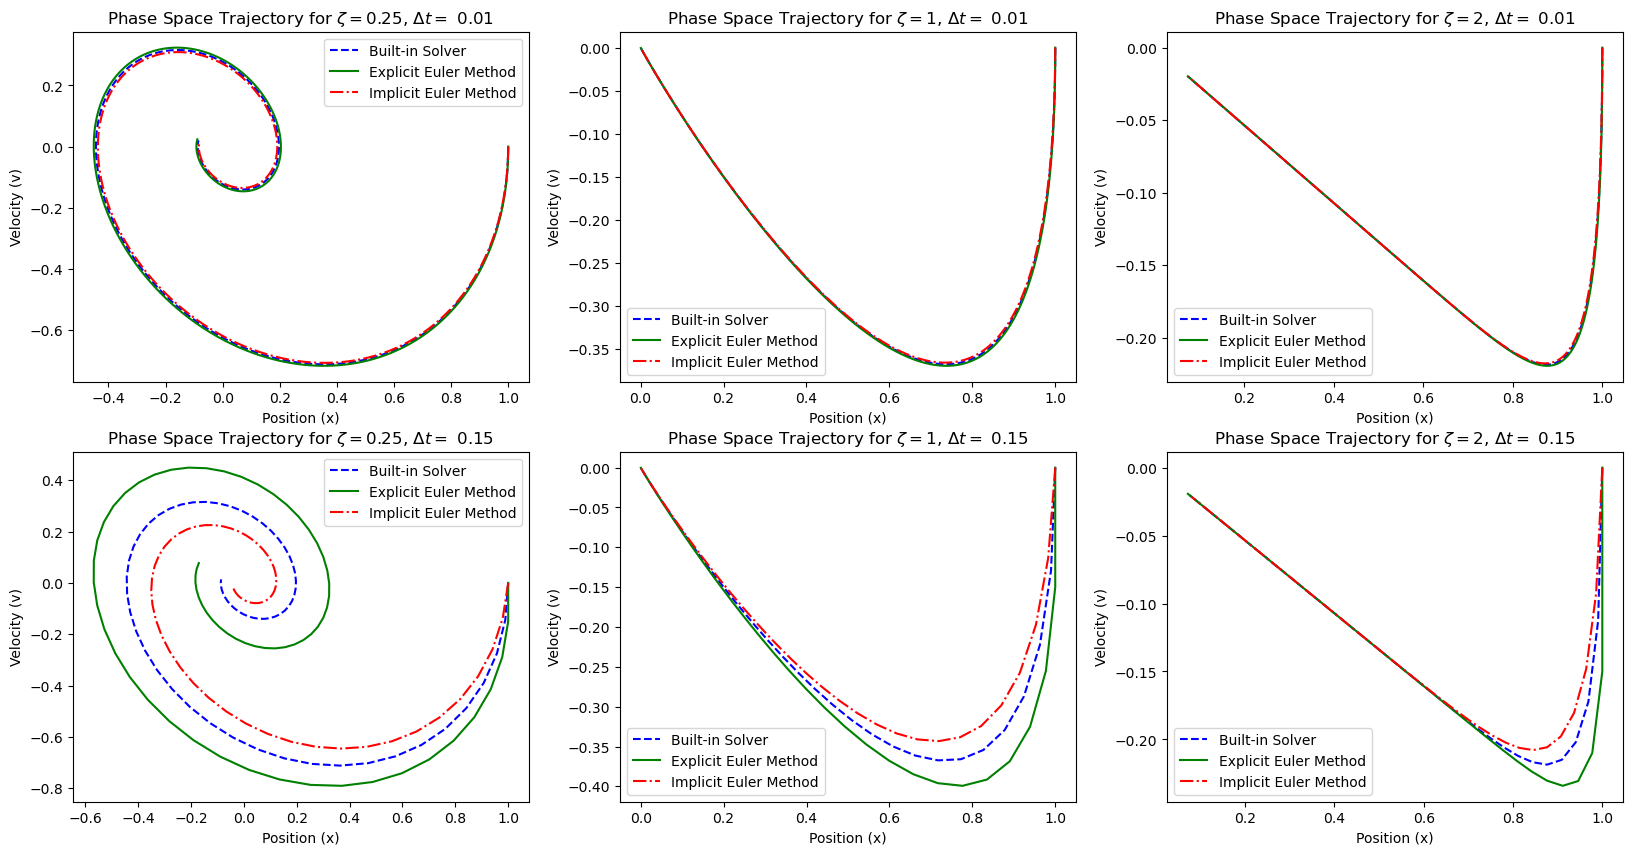

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # Figure with 3 subplots horizontally arranged

# index 1
i = 0;

# For big and small timestamps
for dt in [dt_0, dt_1]:

    # index 2
    j = 0;
    
    # Method labels
    methods = ["Built-in Solver", "Explicit Euler Method", "Implicit Euler Method"]  

    # Loop over each zeta value
    for zeta in zetas:  

        # solve_ivp ; X[-][-][-][0]

        axs[i,j].plot(X[dt][zeta]['x'][0], X[dt][zeta]['v'][0], 
                    label=methods[0], linestyle='--', color='blue')  # Plot built-in solver method

        # Explicit Euler ; X[-][-][-][1]

        axs[i,j].plot(X[dt][zeta]['x'][1], X[dt][zeta]['v'][1], 
                    label=methods[1], linestyle='-', color='green')  # Plot explicit method

        # Implicit Euler ; X[-][-][-][2]

        axs[i,j].plot(X[dt][zeta]['x'][2], X[dt][zeta]['v'][2], 
                    label=methods[2], linestyle='-.', color='red')  # Plot implicit method

        axs[i,j].set_xlabel('Position (x)')  
        axs[i,j].set_ylabel('Velocity (v)')  
        axs[i,j].set_title(f"Phase Space Trajectory for $\zeta = {zeta}$, $\Delta t = $ {dt:.2f}")
        axs[i,j].legend()           

        # increments twice
        j += 1
    # increments once
    i += 1

One can of course. introduce more coefficients $\zeta$ or manipulate the choices of $\Delta t_0, \Delta t_1$ when convenient. 

$\textbf{1.3. Errors}$

Since we already have the built-in ```scipy.integrate.solve_ivp```, it will be our reference when checking the accuracy of our two Euler schemes. To make nice log-log graphs, we simply summon the ```plt.loglog()``` command. In order to plot the error versus step size, we would like to

$\textbf{a)}$ call timestamps $\Delta t$ between $[0.01, 1]$;  
$\textbf{b)}$ find the error $\epsilon$ for each timestamp $\Delta t,$ which will be the average error in comparison to `solve_ivp`;  
$\textbf{c)}$ plot the results in the form $(\Delta t, \epsilon).$

$\textbf{a)}$ The variable `tstamps` has already been introduced with values $\Delta t_i \in [0.1, 1].$

$\textbf{b)}$ Now that we have the timestamps, we can start computing the errors. We will introduce the following convention:

- ```E[-][-][-][1]``` is the explicit Euler ***error*** for (x or v); 
- ```E[-][-][-][2]``` is the implicit Euler ***error*** for (x or v);

in harmony with 
- `X[-][-][-][1]` $\mapsto$ `explicit_euler`;
- `X[-][-][-][2]` $\mapsto$ `implicit_euler`.

In [15]:
E = {}

for dt in tstamps:
    E[dt] = {} # Initialize dictionary
    for zeta in zetas:
        E[dt][zeta] = {'x': [], 'v': []}  # Initialize placeholders x, v
        
        # More data handling
        E[dt][zeta]['x'] = [None, None, None]  
        E[dt][zeta]['v'] = [None, None, None]
        
        # displacement error
        E[dt][zeta]['x'][1] = abs(X[dt][zeta]['x'][0] - X[dt][zeta]['x'][1]) # |reference - explicit|
        E[dt][zeta]['x'][2] = abs(X[dt][zeta]['x'][0] - X[dt][zeta]['x'][2]) # |reference - implicit|
        
        # velocity error
        E[dt][zeta]['v'][1] = abs(X[dt][zeta]['v'][0] - X[dt][zeta]['v'][1]) # |reference - explicit|
        E[dt][zeta]['v'][2] = abs(X[dt][zeta]['v'][0] - X[dt][zeta]['v'][2]) # |reference - implicit|

Notice now that for instance, the error ```E[0.01][zeta]['x or v'][1 or 2]``` has 1000 elements. 

In [16]:
len(E[0.01][0.25]['x'][1])

1000

It only makes sense to take the average of these values for each timestamp ```dt``` so that we can get the full picture.

In [17]:
for dt in tstamps:
    for zeta in zetas:
        E[dt][zeta]['x'][1] = np.mean(E[dt][zeta]['x'][1])
        E[dt][zeta]['v'][1] = np.mean(E[dt][zeta]['v'][1])
        
        E[dt][zeta]['x'][2] = np.mean(E[dt][zeta]['x'][2])
        E[dt][zeta]['v'][2] = np.mean(E[dt][zeta]['v'][2])

With that off the checklist, we are ready to look at some nice graphs.

$\textbf{c)}$ Choose your preferred value for the parameter $\zeta \in \{0.25, 1, 2\}.$ We note that the dictionary `X` is only defined for these values, but that can be easily changed by appending the desired $\zeta$ to `zetas`.

In [18]:
zeta = 2

Then, collect the error averages for each method and variable. These will be the arrays of y-values in the $(\Delta t, \epsilon)$ construction.

In [19]:
i=0; tstmps = len(tstamps)

# initialization
explicit_error_x = np.zeros(tstmps)
implicit_error_x = np.zeros(tstmps)
explicit_error_v = np.zeros(tstmps)
implicit_error_v = np.zeros(tstmps)

# for each timestep
for dt in tstamps:
    
    # explicit error averages
    explicit_error_x[i] = E[dt][zeta]['x'][1]
    explicit_error_v[i] = E[dt][zeta]['v'][1]
    # implicit error averages
    implicit_error_x[i] = E[dt][zeta]['x'][2]
    implicit_error_v[i] = E[dt][zeta]['v'][2]
    
    # increment
    i += 1

Next, one simply plots timestamps $\Delta t$ versus error $\epsilon$ for each scheme.

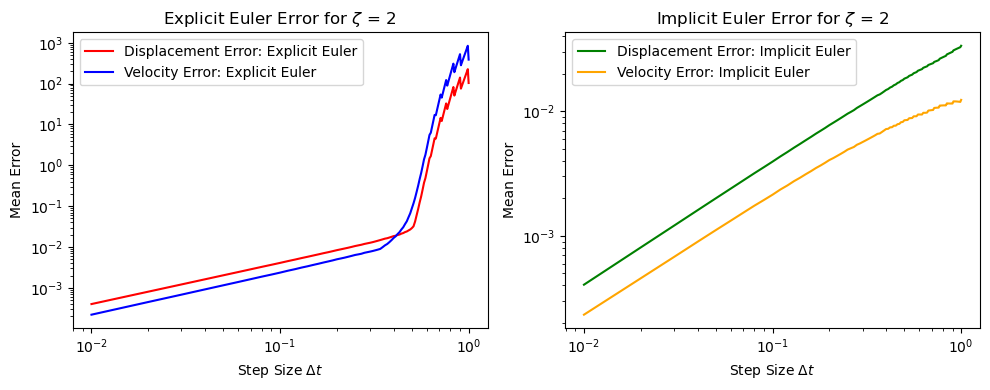

In [20]:
# Plot setup
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Displacement Error for Explicit Euler
axs[0].loglog(tstamps, explicit_error_x, 
                 label="Displacement Error: Explicit Euler", linestyle='-', color='red')

# Velocity Error for Explicit Euler
axs[0].loglog(tstamps, explicit_error_v, 
                 label="Velocity Error: Explicit Euler", linestyle='-', color='blue')

axs[0].set_title(f'Explicit Euler Error for $\zeta$ = {zeta}')
axs[0].set_xlabel('Step Size $\Delta t$')
axs[0].set_ylabel('Mean Error')
axs[0].legend()

# Displacement Error for Implicit Euler
axs[1].loglog(tstamps, implicit_error_x, 
                 label="Displacement Error: Implicit Euler", linestyle='-', color='green')

# Velocity Error for Implicit Euler
axs[1].loglog(tstamps, implicit_error_v, 
                 label="Velocity Error: Implicit Euler", linestyle='-', color='orange')

# Some details
axs[1].set_title(f'Implicit Euler Error for $\zeta$ = {zeta}')
axs[1].set_xlabel('Step Size $\Delta t$')
axs[1].set_ylabel('Mean Error')
axs[1].legend()


# Adjust layout and display plot
plt.tight_layout()
plt.show()

We make the following conclusions:

- the $\textbf{Explicit Euler Method}$ has an error of order $\mathcal O(\Delta t^2);$ 
- the $\textbf{Implicit Euler Method}$ similarly yields an error of order $\mathcal O(\Delta t^2).$ 

This conlcudes the exercise. $\square$